In [1]:
import numpy as np
import matplotlib.pyplot

In [4]:
def simulated_set(trials, experiments, prolonging=0):
    results = []
    for exp in range(experiments):
        ran_set = np.random.rand(trials)
        stacks_consumed = np.sum(ran_set >= prolonging*0.10)
        results.append(stacks_consumed)
    return results

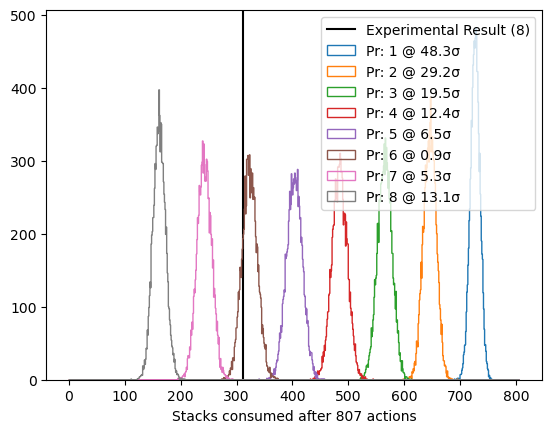

In [37]:
def do_math(stacks, actions, starting_stacks, pr_expected=8):
    actions = int(actions)
    delta_stacks = starting_stacks - stacks
    plt.axvline(delta_stacks, label=f"Experimental Result ({pr_expected})", color='black')
    for prol_test in np.arange(1, 9, 1):
        expected_results = simulated_set(actions, 10000, prol_test)
        sigma_width = np.std(expected_results)
        mean_value = np.mean(expected_results)
        probability = abs((delta_stacks - mean_value)/sigma_width)
        y, x, _ = plt.hist(expected_results, histtype='step', label=f'Pr: {prol_test} @ {probability:0.1f}σ', bins=np.arange(0, actions+1, 1))
    plt.xlabel(f"Stacks consumed after {actions} actions")
    plt.legend()
    plt.show()
    
do_math(340, 13719/17, 651)

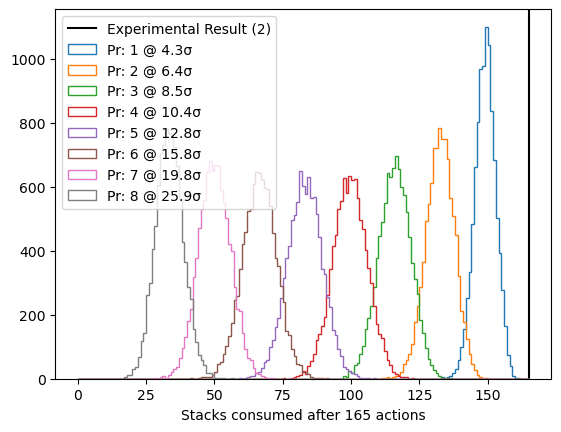

In [44]:
do_math(175, 2805/17, 340, 2)

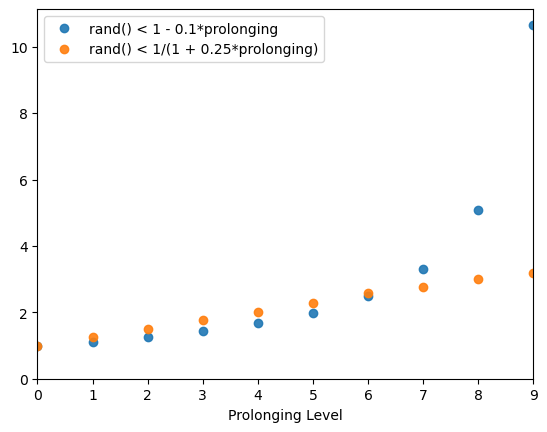

In [62]:
def current_function(x):
    return (1 - 0.1*x)

def new_function(x):
    return 1/(1 + 0.25*x)

def prolonging_feedback(trials, input_function, name):
    prol_buff = np.arange(0, 10, 1)
    z = []
    for pr in prol_buff:
        rolls = np.random.rand(trials)
        pval = input_function(pr)
        stacks_used = np.sum( rolls < pval )
        z.append( trials / stacks_used )
    plt.plot(prol_buff, z, 'o', label=name, alpha=0.9)

prolonging_feedback(10000, current_function, 'rand() < 1 - 0.1*prolonging')
prolonging_feedback(10000, new_function, 'rand() < 1/(1 + 0.25*prolonging)')
plt.xlabel("Prolonging Level")
plt.ylim(bottom=0)
plt.xlim(0, 9)
plt.legend()
plt.show()